In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import warnings
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import RFECV
plt.style.use('seaborn-bright')

df = pd.read_csv('C:/ds_work/source_code/Project_DS/data/train.csv')

In [3]:
## 데이터프레임 만들기

df_notsleep = df[df['CryoSleep']==0]
df_notsleep

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8686,9275_02,Europa,False,A/97/P,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,Diram Conable,False
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
df_Mars = df_notsleep[df_notsleep['HomePlanet']=='Mars']
df_Mars

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
31,0028_01,Mars,False,F/8/P,TRAPPIST-1e,43.0,False,1125.0,0.0,136.0,48.0,0.0,Ceros Mare,False
33,0031_01,Mars,False,F/9/P,TRAPPIST-1e,47.0,False,214.0,0.0,1411.0,0.0,1229.0,Coobix Datie,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8644,9224_01,Mars,False,F/1786/S,TRAPPIST-1e,24.0,False,745.0,639.0,977.0,4.0,0.0,Bants Reke,False
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False
8660,9239_01,Mars,False,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,128.0,0.0,Per Minen,False


# Mars에서 온 사람 중 동면하지 않은 사람의 Transported

<Figure size 936x288 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Transported'>

Text(0.5, 1.0, 'Transported passangers in counts')

Text(True, 757, '757')

Text(False, 290, '290')

<AxesSubplot:>

([<matplotlib.patches.Wedge at 0x1ec5c9ea5e0>,
 [Text(-0.7091712366994991, 0.8408782058289436, 'True'),
  Text(0.7091713154281958, -0.8408781394315367, 'False')],
 [Text(-0.3868206745633631, 0.4586608395430601, '72.30%'),
  Text(0.38682071750628855, -0.45866080332629267, '27.70%')])

Text(0.5, 1.0, 'Transported passangers in %')

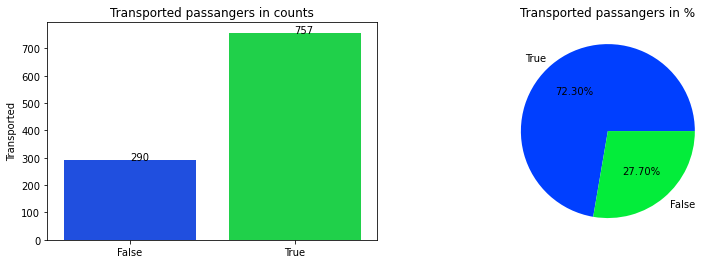

In [5]:
#Transported passangers in %
#Predictions: True for Transported, False for Lost) 
plt.figure(figsize=(13,4))
plt.subplot(121)
sbn.barplot(x=df_Mars.Transported.unique(), y=df_Mars.Transported.value_counts())
plt.title("Transported passangers in counts")
for i, j in zip(df_Mars.Transported.unique(), df_Mars.Transported.value_counts()):
    plt.annotate(str(j), xytext=(i, j), xy=(i, j))
plt.subplot(122)
plt.pie(df_Mars.Transported.value_counts(), labels=df_Mars.Transported.unique(), autopct='%.2f%%')
plt.title("Transported passangers in %")
plt.show()

#### 동면+Mars 출신 = 1047명
#### 동면+Mars+Transported 성공 = 757명(72.30%)
#### 동면+Mars+Transported 실패 = 290명(27.70%)

# 동면+Mars+도착지

<Figure size 936x720 with 0 Axes>

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

Text(0.5, 1.0, 'Number of people travelled from HomePlanet to destination')

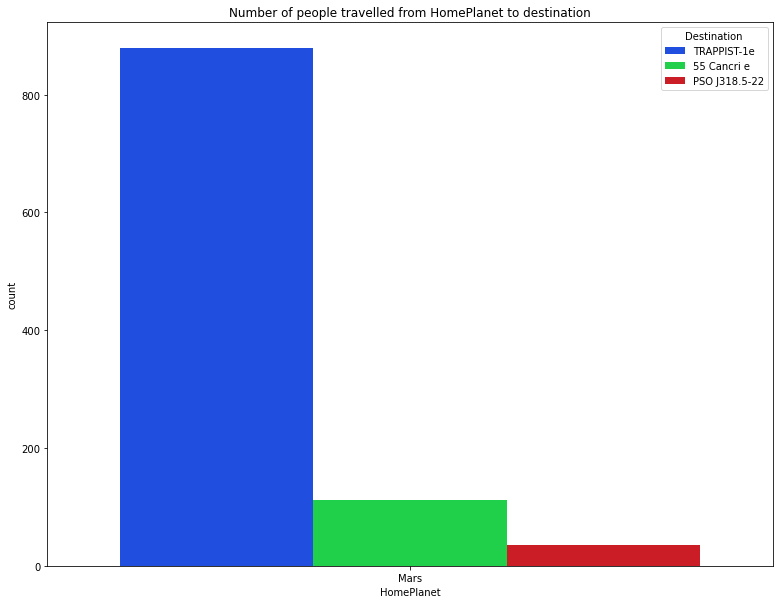

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,,
55 Cancri e,112,112,112,111,110,110,109,110,106,112,110,108,112
PSO J318.5-22,36,36,36,35,36,35,34,36,36,35,35,36,36
TRAPPIST-1e,879,879,879,862,856,858,863,863,863,862,860,863,879


In [6]:
#Number of people travelled from HomePlanet to destination
plt.figure(figsize=(13,10))
sbn.countplot(data=df_Mars, x='HomePlanet', hue='Destination')
plt.title("Number of people travelled from HomePlanet to destination")
#plt.text(x='HomePlanet',y='Destination',s=df_Europa['Destination'].count)
plt.show()

df_Mars.groupby('Destination').count()

#### 동면+Europa+도착지 TRAPPIST-1e = 879명
#### 동면+Europa+도착지 55 Cancri e = 112명
#### 동면+Europa+도착지 PSO J318.5-22 = 36명

# 나이별 시각화

#### Mars의 나이 분포

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46'),
 Text(46, 0, '47'),
 Text(47, 0, '48'),
 Text(48, 0, '49'),
 Text(49, 0, '50'),
 Text(50, 0, '51'),

Text(0.5, 1.0, 'Visualizing people of different ages travelled from Europa')

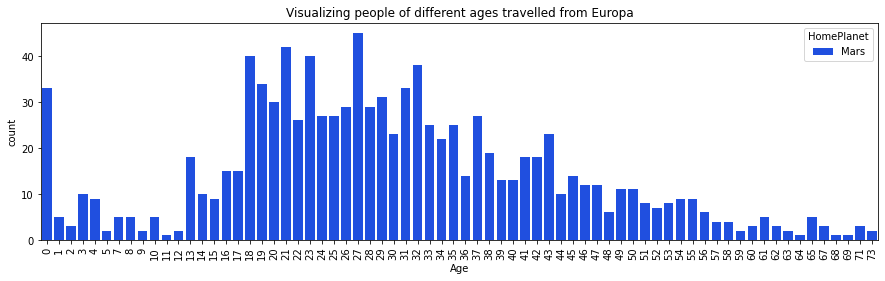

In [7]:
#Visualizing people of different ages travelled from HomePlanet
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_Mars[~(df_Mars.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='HomePlanet')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled from Mars")
plt.show()

#### Mars에서 도착지별 나이 분포

<Figure size 1080x288 with 0 Axes>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31'),
 Text(31, 0, '32'),
 Text(32, 0, '33'),
 Text(33, 0, '34'),
 Text(34, 0, '35'),
 Text(35, 0, '36'),
 Text(36, 0, '37'),
 Text(37, 0, '38'),
 Text(38, 0, '39'),
 Text(39, 0, '40'),
 Text(40, 0, '41'),
 Text(41, 0, '42'),
 Text(42, 0, '43'),
 Text(43, 0, '44'),
 Text(44, 0, '45'),
 Text(45, 0, '46'),
 Text(46, 0, '47'),
 Text(47, 0, '48'),
 Text(48, 0, '49'),
 Text(49, 0, '50'),
 Text(50, 0, '51'),

Text(0.5, 1.0, 'Visualizing people of different ages travelled to Destination')

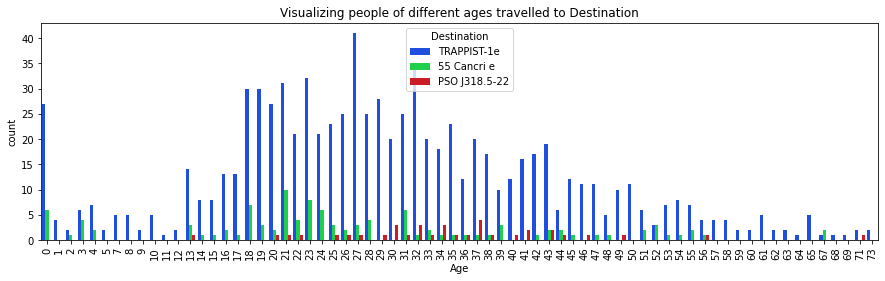

In [8]:
#Visualizing people of different ages travelled to Destination
plt.figure(figsize=(15,4))
warnings.filterwarnings('ignore')
Age_nomiss=df_Mars[~(df_Mars.Age.isna())]
Age_nomiss['Age']=Age_nomiss.Age.astype('int')
g=sbn.countplot(data=Age_nomiss, x='Age', hue='Destination')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Visualizing people of different ages travelled to Destination")
plt.show()

#### Mars 도착지별 평균 나이
#### 55 Cancri e : 26세 / PSO J318.5-22 : 35세 / TRAPPIST-1e : 29세

<AxesSubplot:>

Text(0.5, 1.0, 'Average Age people travelled from HomePlanet to distination')

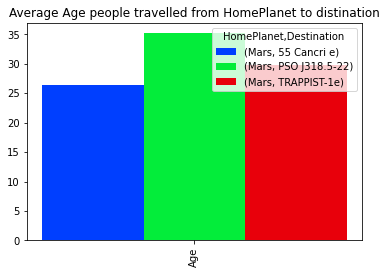

Destination
55 Cancri e      26.454545
PSO J318.5-22    35.166667
TRAPPIST-1e      29.745327
Name: Age, dtype: float64

In [9]:
pd.pivot_table(data=df_Mars, columns=['HomePlanet', 'Destination'], values='Age').plot(kind='bar', width=5)
plt.title("Average Age people travelled from HomePlanet to distination")
plt.show()

df_g = df_Mars.groupby('Destination')
age_mean = df_g['Age'].mean()
age_mean

## 금액 사용 부분

#### 1. Room Service
##### 55 Cancri e > TRAPPIST-1e > PSO J318.5-22

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for Room Service')

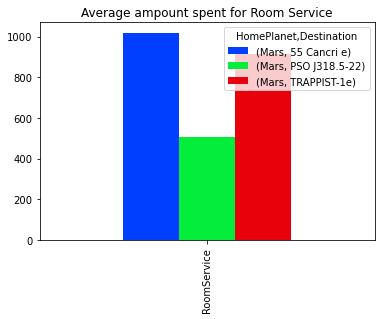

Destination
55 Cancri e      1018.954128
PSO J318.5-22     506.058824
TRAPPIST-1e       917.213210
Name: RoomService, dtype: float64

In [11]:
pd.pivot_table(data=df_Mars, columns=['HomePlanet', 'Destination'], values='RoomService').plot(kind='bar')
plt.title("Average ampount spent for Room Service")
plt.show()

age_mean_R = df_g['RoomService'].mean()
age_mean_R

#### 2. FoodCourt
##### PSO J318.5-22 > 55 Cancri e  >  TRAPPIST-1e

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for FoodCourt')

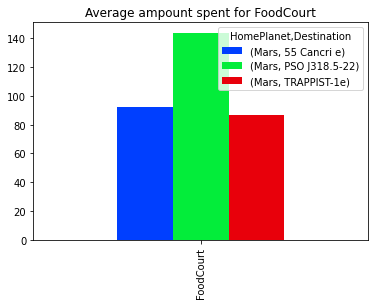

Destination
55 Cancri e       92.063636
PSO J318.5-22    143.944444
TRAPPIST-1e       86.550406
Name: FoodCourt, dtype: float64

In [12]:
pd.pivot_table(data=df_Mars, columns=['HomePlanet', 'Destination'], values='FoodCourt').plot(kind='bar')
plt.title("Average ampount spent for FoodCourt")
plt.show()

age_mean_F = df_g['FoodCourt'].mean()
age_mean_F

#### 3. ShoppingMall
#####  55 Cancri e > PSO J318.5-22 > TRAPPIST-1e

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for ShoppingMall')

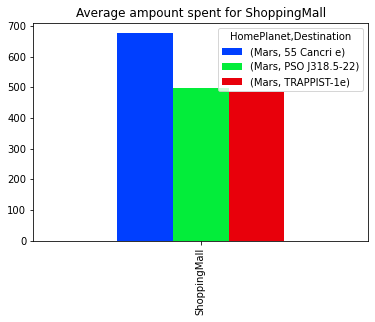

Destination
55 Cancri e      675.575472
PSO J318.5-22    498.111111
TRAPPIST-1e      483.838934
Name: ShoppingMall, dtype: float64

In [13]:
pd.pivot_table(data=df_Mars, columns=['HomePlanet', 'Destination'], values='ShoppingMall').plot(kind='bar')
plt.title("Average ampount spent for ShoppingMall")
plt.show()

age_mean_SM = df_g['ShoppingMall'].mean()
age_mean_SM

#### 4. Spa
##### PSO J318.5-22  > 55 Cancri e > TRAPPIST-1e

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for Spa')

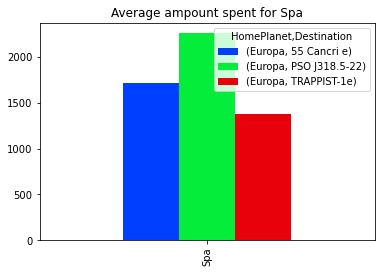

Destination
55 Cancri e      1714.056098
PSO J318.5-22    2259.000000
TRAPPIST-1e      1378.115714
Name: Spa, dtype: float64

In [75]:
pd.pivot_table(data=df_Mars, columns=['HomePlanet', 'Destination'], values='Spa').plot(kind='bar')
plt.title("Average ampount spent for Spa")
plt.show()

age_mean_S = df_g['Spa'].mean()
age_mean_S

#### 5. VRDeck
##### 55 Cancri e > TRAPPIST-1e > PSO J318.5-22 

<AxesSubplot:>

Text(0.5, 1.0, 'Average ampount spent for VRDeck')

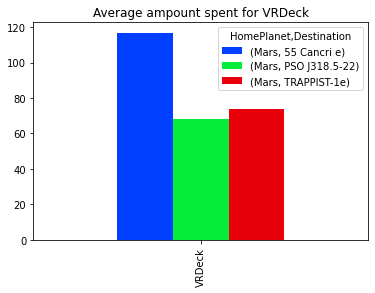

Destination
55 Cancri e      116.745455
PSO J318.5-22     68.400000
TRAPPIST-1e       73.770930
Name: VRDeck, dtype: float64

In [14]:
pd.pivot_table(data=df_Mars, columns=['HomePlanet', 'Destination'], values='VRDeck').plot(kind='bar')
plt.title("Average ampount spent for VRDeck")
plt.show()

age_mean_v = df_g['VRDeck'].mean()
age_mean_v

## VIP 여부
#### VIP인 사람 : 6.16%, VIP가 아닌 사람 : 93.84%

Text(0.5, 0, 'VIP')

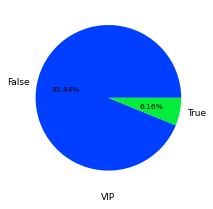

In [15]:
#Visualizing Percentages of people in 'VIP'
import matplotlib as mpl
mpl.rcParams['font.size'] = 9.0
fig = plt.figure(figsize=(15,9))
columns=['VIP']
for i, col in enumerate(columns):
    q, r = divmod(i,4)
    ax = fig.add_subplot(int(str(q+1)+"4"+str(r+1)))
    indeces = df_Mars[col].value_counts().index
    patches, texts, autotexts = ax.pie(df_Mars[col].value_counts(), labels=indeces, autopct='%.2f%%')
    for auto in autotexts:
        auto.set_fontsize(7.5)
    plt.xlabel(col)
plt.show()

## 각 그룹별 Transported

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

<AxesSubplot:xlabel='Destination', ylabel='count'>

<AxesSubplot:xlabel='VIP', ylabel='count'>

ValueError: Could not interpret input 'Deck'

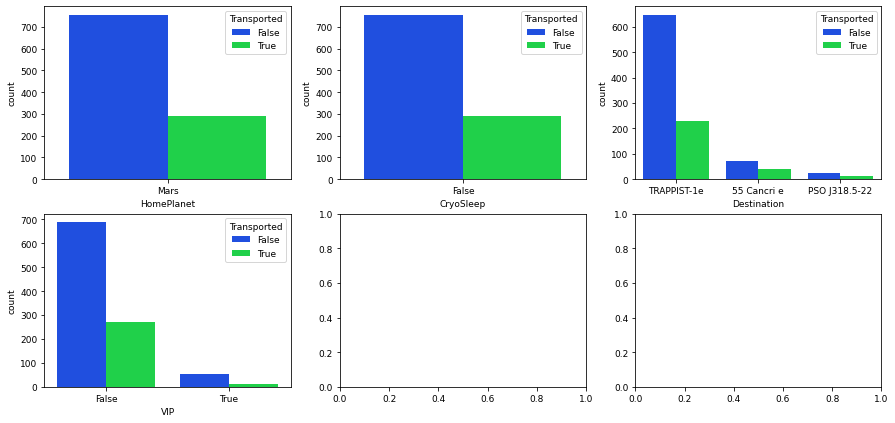

In [16]:
#Transported passangers in category wise
columns=['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q, 3, figsize=(15,7))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.countplot(data=df_Mars, x=columns[i], hue='Transported', ax=ax[q, r])
plt.show()

In [17]:
df_t = df_Mars.groupby('Transported').count()
df_t

df_d = df_Mars.groupby('Destination').count()
df_d

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,757,757,757,740,742,738,742,743,744,742,741,743,744
True,290,290,290,287,285,284,281,283,284,283,288,282,282


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,,
55 Cancri e,112,112,112,111,110,110,109,110,106,112,110,108,112
PSO J318.5-22,36,36,36,35,36,35,34,36,36,35,35,36,36
TRAPPIST-1e,879,879,879,862,856,858,863,863,863,862,860,863,879


<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='RoomService', ylabel='Count'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Count'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Count'>

<AxesSubplot:xlabel='Spa', ylabel='Count'>

<AxesSubplot:xlabel='VRDeck', ylabel='Count'>

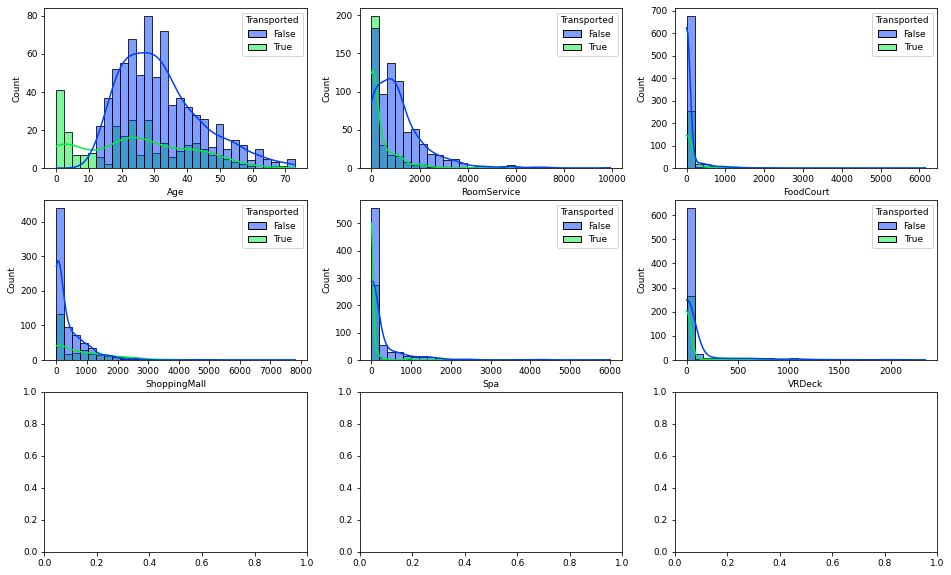

In [19]:
#Visualizing distribution of the data
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(len(columns), 3)
fig, ax=plt.subplots(q+1, 3, figsize=(16,10))
for i in range(0,len(columns)):
    q, r =divmod(i, 3)
    sbn.histplot(data=df_Mars, x=columns[i], hue='Transported', ax=ax[q, r], kde=True, bins=30)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

<AxesSubplot:xlabel='Age', ylabel='FoodCourt'>

<AxesSubplot:xlabel='Age', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='Age', ylabel='Spa'>

<AxesSubplot:xlabel='Age', ylabel='VRDeck'>

<AxesSubplot:xlabel='RoomService', ylabel='FoodCourt'>

<AxesSubplot:xlabel='RoomService', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='RoomService', ylabel='Spa'>

<AxesSubplot:xlabel='RoomService', ylabel='VRDeck'>

<AxesSubplot:xlabel='FoodCourt', ylabel='ShoppingMall'>

<AxesSubplot:xlabel='FoodCourt', ylabel='Spa'>

<AxesSubplot:xlabel='FoodCourt', ylabel='VRDeck'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='Spa'>

<AxesSubplot:xlabel='ShoppingMall', ylabel='VRDeck'>

<AxesSubplot:xlabel='Spa', ylabel='VRDeck'>

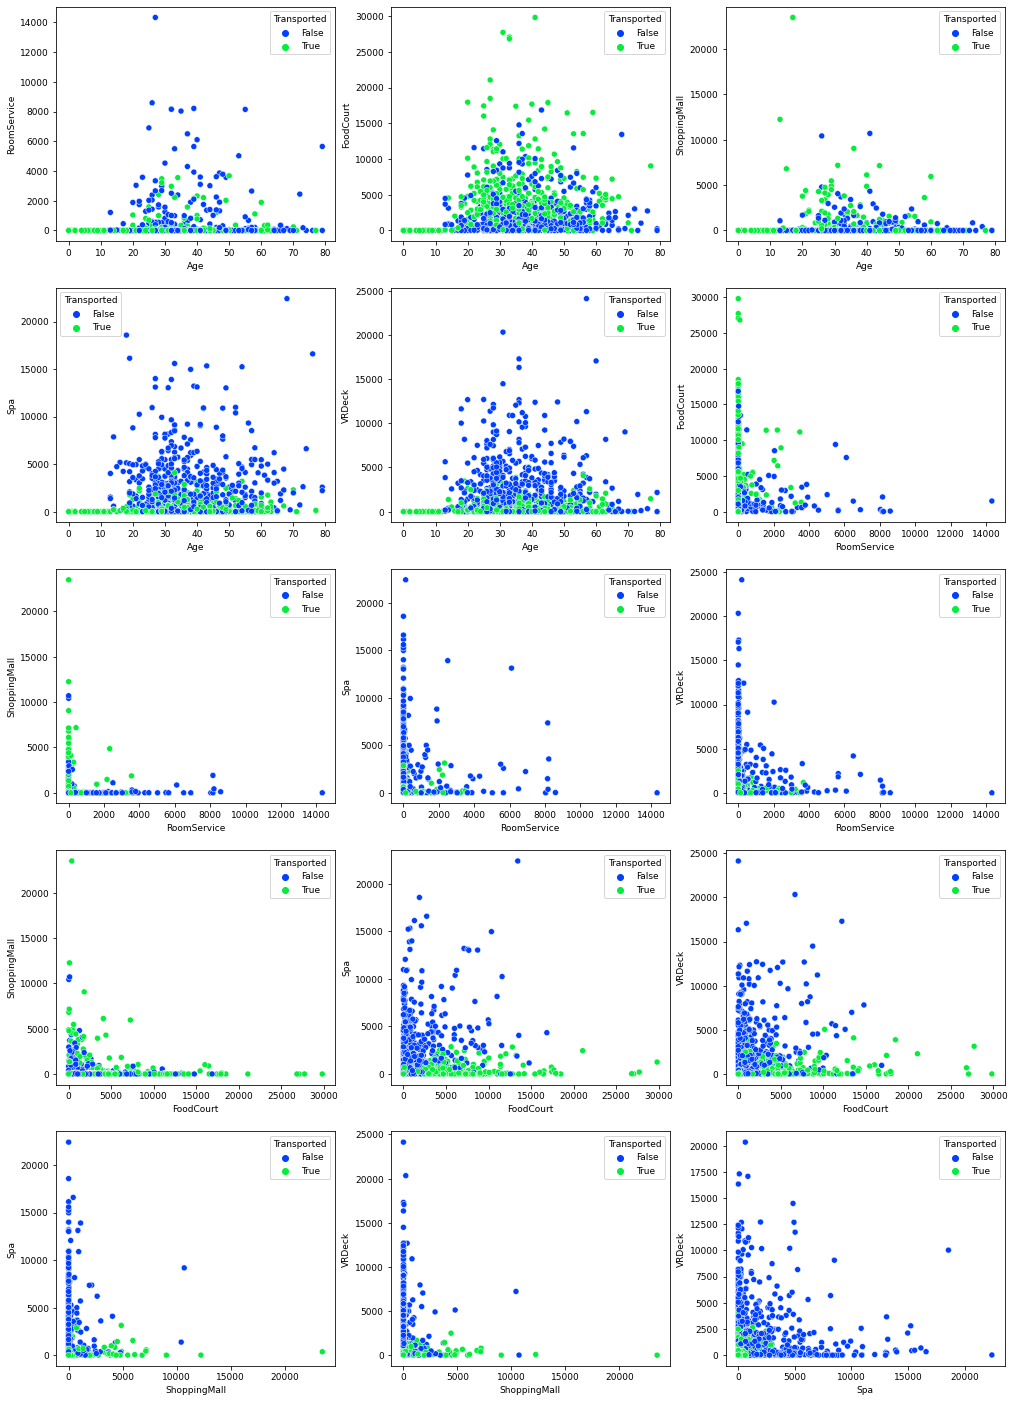

In [102]:
#Visualizing Relationships between variables 
columns=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
q, r =divmod(int(len(columns)*(len(columns)-1)/2), 3)
fig, ax=plt.subplots(q, 3, figsize=(17,25))
k=0
for i in range(0,len(columns)):
    for j in range(i+1,len(columns)):
        q, r =divmod(k, 3)
        k+=1
        sbn.scatterplot(data=df_Europa, x=columns[i], y=columns[j], ax=ax[q, r], hue='Transported')
plt.show()

<Figure size 792x792 with 0 Axes>

<AxesSubplot:>

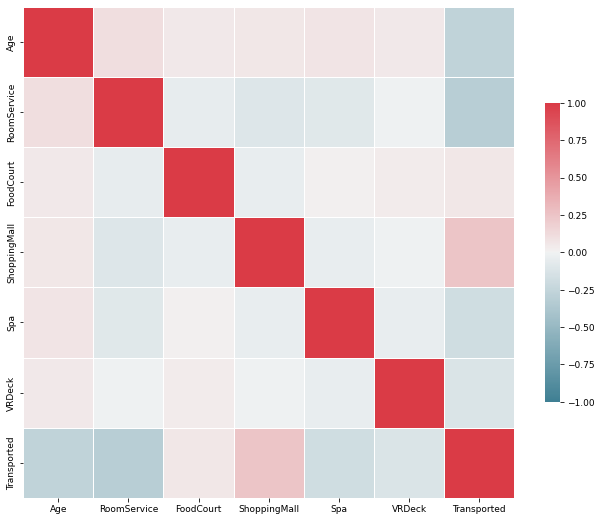

In [20]:
corr = df_Mars.corr(method='pearson')
import seaborn as sns
import matplotlib.pyplot as plt

cmap = sns.diverging_palette(220,10,as_cmap=True)

plt.figure(figsize =(11,11))
sns.heatmap(corr, cmap = cmap, vmax=1.0, vmin = -1.0, center =0, square= True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()